# Introduction

The purpose of this analysis is to provide the Marketing team with insights on consumer behavior towards app downloads. 
We have come up with three recommendations based on the analysis of the marketing survey and the data collected on psychometrical, app usage and consumer behavior. 

## Survey details

This survey was made up of sixteen questions, and it was completed by 1552 people. The survey only had multiple choice and scaling questions. 

### Insights

 - In the psychometric data provided, we have identified three personas: Innate leader, Independent and Follower.
 - In the app usage data, we identified three personas: No App User, Practical and Keep Updated.
 - In the consumer behavior data we identified three personas as well: Buyer, Gadget and Obligated. 
 
### Recommendations

 - Collaborate with influencers within the Indian American and Alaskan communities. 
 - Avoid marketing strategy and efforts towards Digital Castaways: the ones that are less keen to download and use apps.
 - Focus our efforts on Boomer age group, paying special attention to those who enjoy doing online shopping and    entertainment through their mobile devices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


apps_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
print(f""" 
Size of original dataset
---------------------------
Observations :{apps_df.shape[0]}
Features:     {apps_df.shape[1]}
""")

 
Size of original dataset
---------------------------
Observations :1552
Features:     88



In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
 
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    if export == True:
        plt.savefig('./analysis_images/scree_plot_1.png')
    
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [4]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

In [5]:
## Getting the columns within the Dataframe to be able to change the names in the next step. 

## apps_df.columns

In [6]:
# Creating a dictionary to change the names of the columns

dict = {'caseID' : 'caseID',
        'q1' : 'Age group',
        'q2r1' : 'own iPhone',
        'q2r2' : 'own iPod touch',
        'q2r3' : 'own Android',
        'q2r4' : 'own BlackBerry',
        'q2r5' : 'own Nokia',
        'q2r6' : 'own Windows Phone/Mobile',
        'q2r7' : 'own HP/Palm',
        'q2r8' : 'own Tablet',
        'q2r9' : 'own other',
        'q2r10': 'No smartphone/device',
        'q4r1' : 'use music/sound identification apps',
        'q4r2' : 'use TV check-in apps',
        'q4r3' : 'use entertainment apps',
        'q4r4' : 'use TV show apps',
        'q4r5' : 'use gaming apps',
        'q4r6' : 'use social media apps',
        'q4r7' : 'use general news apps',
        'q4r8' : 'use shopping apps',
        'q4r9' : 'use publication news apps',
        'q4r10' : 'use other apps',
        'q4r11' : 'no apps use',
        'q11' : 'number of apps range',
        'q12' : 'free download app range',
        'q13r1' : 'frequency Facebook',
        'q13r2' : 'frequency Twitter',
        'q13r3' : 'frequency MySpace',
        'q13r4' : 'frequency Pandora Radio',
        'q13r5' : 'frequency Vevo',
        'q13r6' : 'frequency YouTube',
        'q13r7' : 'frequency AOL Radio',
        'q13r8' : 'frequency Last.FM',
        'q13r9' : 'frequency Yahoo',
        'q13r10' : 'frequency IMDB',
        'q13r11' : 'frequency LinkedIn',
        'q13r12' : 'frequency Netflix',
        'q24r1' : 'keep up tech developments',
        'q24r2' : 'asked tech advice',
        'q24r3' : 'enjoy purchase new appliances/gadgets',
        'q24r4' : 'too much tech in life',
        'q24r5' : 'enjoy using tech to control life',
        'q24r6' : 'tools and app to save time',
        'q24r7': 'Music important',
        'q24r8' : 'Knowing TV shows',
        'q24r9' : 'too much information on internet',
        'q24r10' : 'like connecting through social media',
        'q24r11' : 'easier keeping in touch w/internet',
        'q24r12' : 'internet helps avoid family',
        'q25r1': 'opinion leader',
        'q25r2' : 'like standing out',
        'q25r3' : 'like offering advice',
        'q25r4' : 'likes lead in decision making',
        'q25r5' : 'first try new things',
        'q25r6' : 'likes being told what to do',
        'q25r7' : 'likes being in control',
        'q25r8' : 'likes taking risks',
        'q25r9' : 'is creative',
        'q25r10' : 'is optimistic',
        'q25r11' : 'is active',
        'q25r12' : 'feels stretched for time',
        'q26r18' : 'luxury brands',
        'q26r3': 'lookout for discounts',
        'q26r4' : 'enjoys shopping',
        'q26r5' : 'likes package deals',
        'q26r6' : 'always shopping online',
        'q26r7' : 'prefers designer brands',
        'q26r8' : 'not enough apps',
        'q26r9' : 'coolness of apps matter most',
        'q26r10' : 'likes showing off apps',
        'q26r11' : 'children impact on apps',
        'q26r12' : 'spend on extra app features',
        'q26r13' : 'earn money to spend',
        'q26r14' : 'influenced by popularity',
        'q26r15' : 'buy brands reflect style',
        'q26r16' : 'tend to impulse purchases',
        'q26r17' : 'mobile phone source entertainment',
        'q48' : 'Education level',
        'q49' : 'marital status',
        'q50r1' : 'no children',
        'q50r2' : 'children under 6',
        'q50r3' : 'children 6-12',
        'q50r4' : 'children 13-17',
        'q50r5' : 'children 18 or older',
        'q54' : 'Race',
        'q55' : 'hispanic/latino',
        'q56' : 'annual income range',
        'q57' : 'gender'}

apps_df.rename(columns = dict,
              inplace = True)

In [7]:
# Creating lists to divide the type of data we want to analyze
# demographics, usage, psychometrics and consumer behavior. 

demographics = apps_df[['Age group','Education level','marital status',
                        'no children','children under 6','children 6-12',
                        'children 13-17','children 18 or older','Race',
                        'hispanic/latino','annual income range', 'gender',
                        'own iPhone', 'own iPod touch', 'own Android',
                        'own BlackBerry', 'own Nokia','own Windows Phone/Mobile',
                        'own HP/Palm', 'own Tablet','own other', 'No smartphone/device']]
    
usage_apps = apps_df[['use music/sound identification apps','use TV check-in apps',
            'use entertainment apps','use TV show apps', 'use gaming apps', 
            'use social media apps','use general news apps', 'use shopping apps', 
            'use publication news apps','use other apps', 'no apps use',
            'number of apps range','free download app range', 'frequency Facebook',
            'frequency Twitter', 'frequency MySpace', 'frequency Pandora Radio',
            'frequency Vevo', 'frequency YouTube', 'frequency AOL Radio',
            'frequency Last.FM', 'frequency LinkedIn', 'frequency Netflix']]
    
psychometrics_apps = apps_df[['opinion leader', 'like standing out',
                     'like offering advice', 'likes lead in decision making',
                     'first try new things', 'likes being told what to do',
                     'likes being in control', 'likes taking risks','is creative',
                     'is optimistic', 'is active', 'feels stretched for time']]

apps_behavior = apps_df[['keep up tech developments', 'asked tech advice', 
                     'enjoy purchase new appliances/gadgets', 'too much tech in life',
                     'enjoy using tech to control life', 'tools and app to save time',
                     'Music important', 'Knowing TV shows', 'too much information on internet',
                     'like connecting through social media', 'easier keeping in touch w/internet',
                      'internet helps avoid family','luxury brands', 'lookout for discounts',
                              'enjoys shopping','likes package deals', 
                              'always shopping online','prefers designer brands',
                              'not enough apps','coolness of apps matter most', 
                              'likes showing off apps','children impact on apps',
                              'spend on extra app features','earn money to spend', 
                              'influenced by popularity', 'buy brands reflect style',
                              'tend to impulse purchases','mobile phone source entertainment']]


## PCA Analysis 

In [8]:
#scaling app usage 

usage_apps_scaled = unsupervised_scaler(df = usage_apps)

print(np.var(usage_apps), 'n\n')
print(np.var(usage_apps_scaled))

use music/sound identification apps    0.212136
use TV check-in apps                   0.154745
use entertainment apps                 0.248698
use TV show apps                       0.195295
use gaming apps                        0.179871
use social media apps                  0.151941
use general news apps                  0.248962
use shopping apps                      0.249232
use publication news apps              0.227073
use other apps                         0.072972
no apps use                            0.017094
number of apps range                   1.041629
free download app range                1.801433
frequency Facebook                     0.768333
frequency Twitter                      1.538911
frequency MySpace                      1.019038
frequency Pandora Radio                1.393160
frequency Vevo                         1.150461
frequency YouTube                      0.644934
frequency AOL Radio                    0.915226
frequency Last.FM                      0

In [9]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
usage_apps_pca = pca.fit_transform(usage_apps_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", usage_apps_scaled.shape)
print("PCA shape     :", usage_apps_pca.shape)

Original shape: (1552, 23)
PCA shape     : (1552, 23)


In [10]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.205
PC 2: 0.104
PC 3: 0.068
PC 4: 0.05
PC 5: 0.048
PC 6: 0.042
PC 7: 0.04
PC 8: 0.04
PC 9: 0.038
PC 10: 0.035
PC 11: 0.034
PC 12: 0.032
PC 13: 0.03
PC 14: 0.029
PC 15: 0.028
PC 16: 0.026
PC 17: 0.026
PC 18: 0.025
PC 19: 0.023
PC 20: 0.022
PC 21: 0.019
PC 22: 0.018
PC 23: 0.017


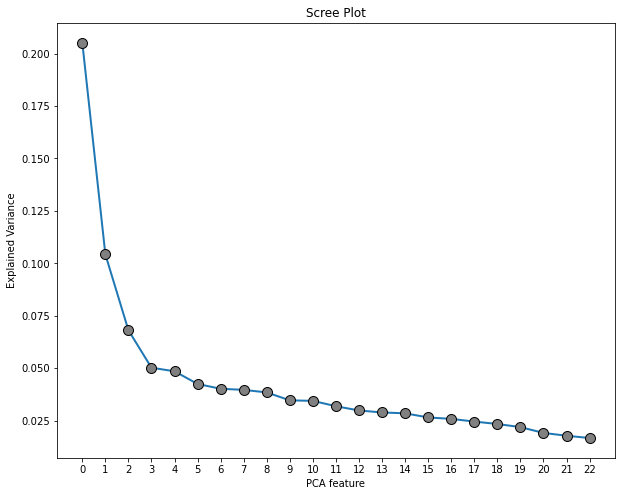

In [11]:
scree_plot(pca_object = pca,
          export = False)

## App usage PCA

We decided to use three components based on the 'elbow' of the graph, which represents the variance in the data analyzed. 
We discovered that the best results are found when creating three personas when working with these questions from the survey. 

In [12]:
# INSTANTIATING a PCA object with no limit to principal components
usage_pca_3 = PCA(n_components = 3,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
usage_apps_pca_3 = usage_pca_3.fit_transform(usage_apps_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", usage_apps_scaled.shape)
print("PCA shape     :", usage_apps_pca_3.shape)

Original shape: (1552, 23)
PCA shape     : (1552, 3)


In [13]:
# INSTANTIATING a new model using the first three principal components
usage_pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
usage_apps_pca_3 = usage_pca_3.fit_transform(usage_apps_scaled)

In [14]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
usage_apps_factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
usage_apps_factor_loadings = usage_apps_factor_loadings.set_index(usage_apps_scaled.columns)


##################
### 2 PC Model ###
##################
# transposing pca components (pc = 2)
usage_apps_factor_loadings_3 = pd.DataFrame(np.transpose(usage_pca_3.components_))


# naming rows as original features
usage_apps_factor_loadings_3 = usage_apps_factor_loadings_3.set_index(usage_apps_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{usage_apps_factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{usage_apps_factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                       0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22
use music/sound identification apps  0.13 -0.30  0.11  0.11  0.47  0.00 -0.20 -0.06  0.02 -0.16 -0.35 -0.02 -0.02 -0.08  0.00 -0.33  0.51  0.10 -0.13  0.10 -0.00 -0.18 -0.12
use TV check-in apps                 0.26 -0.01  0.21 -0.06 -0.12 -0.09  0.25 -0.11  0.24  0.24 -0.21 -0.06 -0.40 -0.23 -0.09 -0.25 -0.17  0.36  0.34 -0.19 -0.16 -0.07  0.00
use entertainment apps               0.22 -0.17  0.14 -0.36 -0.03 -0.13  0.04 -0.00  0.13 -0.07 -0.03  0.08  0.28  0.57  0.49 -0.19 -0.14  0.12  0.01 -0.05 -0.02 -0.01  0.03
use TV show apps                     0.26 -0.02  0.19 -0.23 -0.16 -0.19  0.26  0.00  0.18  0.03 -0.36 -0.05 -0.09 -0.13  0.03  0.26  0.11 -0.54 -0.12  0.28  0.25  0.04 -0.03
use gaming apps                      0.11 -0.27 -0.15 -0.38 -0.03 -

## Personas for app usage

The three personas cretaed for app usage are: 
 - Practical: This is a group that most likely do not use mobile apps for social media. This group uses mobile apps to check news and entertain themselves with gaming apps for example. 
 - No App User: This group of people does not really use mobile apps for anything in particular. We can see that the only app they might be using within their mobile devices is Facebook. 
 - Keep Updated: This group of people uses mobile apps to navigate through news, YouTube or Facebook. We can say they want to keep informed of what is happening in the world and in their own communities. 

In [15]:
# naming each principal component
usage_apps_factor_loadings_3.columns = ['Practical',
                                       'No App User',
                                       'Keep Updated']


# checking the result
usage_apps_factor_loadings_3.round(decimals = 2)

,Practical,No App User,Keep Updated
use music/sound identification apps,0.13,-0.30,0.11
use TV check-in apps,0.26,-0.01,0.21
use entertainment apps,0.22,-0.17,0.14
use TV show apps,0.26,-0.02,0.19
use gaming apps,0.11,-0.28,-0.15
use social media apps,0.09,-0.41,-0.33
use general news apps,0.16,-0.21,0.24
use shopping apps,0.19,-0.22,0.24
use publication news apps,0.20,-0.19,0.30
use other apps,-0.03,-0.02,0.11


In [16]:
# analyzing factor strengths per customer
usage_apps_factor_loadings = usage_pca_3.transform(usage_apps_scaled)


# converting to a DataFrame
usage_apps_factor_loadings_df = pd.DataFrame(usage_apps_factor_loadings)


# renaming columns
usage_apps_factor_loadings_df.columns = usage_apps_factor_loadings_3.columns


# checking the results
usage_apps_factor_loadings_df.head(n=25)

,Practical,No App User,Keep Updated
0,-3.542316,1.594389,-0.012646
1,2.962449,3.219886,1.080712
2,-2.459810,0.524599,-1.898143
3,-2.050455,0.753160,0.069089
4,0.115402,3.302629,-0.407716
5,-5.335376,4.732309,3.198392
6,0.986613,-1.051684,0.517554
7,-2.378743,0.328247,0.423816
8,-0.608894,-1.690840,0.888946
9,-3.062278,-0.145111,1.001292


In [17]:
# checking variance amongst clusters
np.var(usage_apps_factor_loadings_df)

Practical       4.719133
No App User     2.396448
Keep Updated    1.564648
dtype: float64

In [18]:
# applying the unsupervised_scaler function
usage_apps_pca_scaled = unsupervised_scaler(df = usage_apps_factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(usage_apps_factor_loadings_df), '\n\n')
print(np.var(usage_apps_pca_scaled))

Practical       4.719133
No App User     2.396448
Keep Updated    1.564648
dtype: float64 


Practical       1.0
No App User     1.0
Keep Updated    1.0
dtype: float64


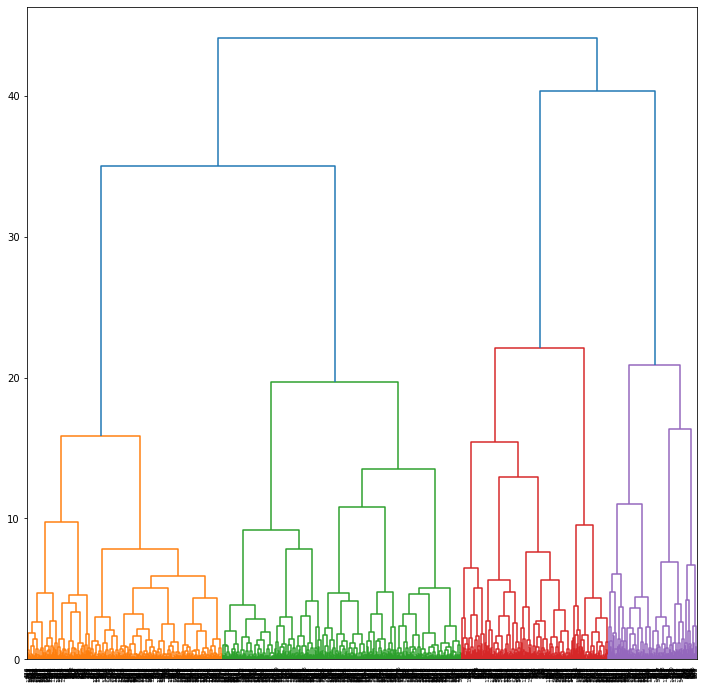

In [19]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = usage_apps_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

## Cluster election for app usage

Considering the amount of people who responded the survey, while looking at the number each cluster represented, we decided to only consider four. 
We did this because, having more clusters would only mean having less people represented within them. 
By having four clusters within the app usage, it makes it easier to determine our potential market segmentations for the development and implementation of strategies. 

In [20]:
# INSTANTIATING a k-Means object with five clusters
usage_apps_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)


# fitting the object to the data
usage_apps_k_pca.fit(usage_apps_pca_scaled)


# converting the clusters to a DataFrame
usage_apps_kmeans_pca = pd.DataFrame({'Cluster_usage': usage_apps_k_pca.labels_})


# checking the results
print(usage_apps_kmeans_pca.iloc[: , 0].value_counts())

3    633
2    480
0    266
1    173
Name: Cluster_usage, dtype: int64


In [21]:
# storing cluster centers
usage_app_centroids_pca = usage_apps_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
usage_app_centroids_pca_df = pd.DataFrame(app_centroids_pca)


# renaming principal components
usage_app_centroids_pca_df.columns = ['Practical', 
                            'No App User', 
                            'Keep Updated']


# checking results (clusters = rows, pc = columns)
usage_app_centroids_pca_df.round(2)

,Practical,No App User,Keep Updated
0,1.47,0.97,-0.06
1,-0.97,1.12,1.63
2,0.20,-0.91,0.45
3,-0.50,-0.02,-0.76


In [22]:
#scaling psychometrics 

psychometrics_scaled = unsupervised_scaler(df = psychometrics_apps)

print(np.var(psychometrics_apps), 'n\n')
print(np.var(psychometrics_scaled))

opinion leader                   1.251600
like standing out                1.494538
like offering advice             1.175736
likes lead in decision making    1.214625
first try new things             1.364530
likes being told what to do      2.392788
likes being in control           1.108724
likes taking risks               1.536148
is creative                      1.247248
is optimistic                    1.296109
is active                        1.364405
feels stretched for time         1.770293
dtype: float64 n

opinion leader                   1.0
like standing out                1.0
like offering advice             1.0
likes lead in decision making    1.0
first try new things             1.0
likes being told what to do      1.0
likes being in control           1.0
likes taking risks               1.0
is creative                      1.0
is optimistic                    1.0
is active                        1.0
feels stretched for time         1.0
dtype: float64


In [23]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometrics_pca = pca.fit_transform(psychometrics_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", psychometrics_scaled.shape)
print("PCA shape     :", psychometrics_pca.shape)

Original shape: (1552, 12)
PCA shape     : (1552, 12)


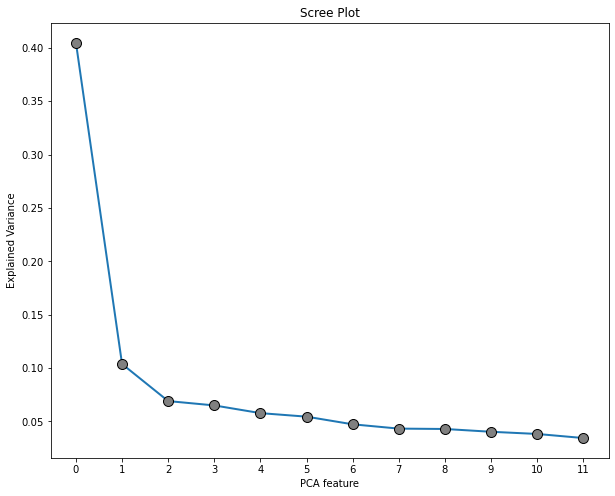

In [24]:
scree_plot(pca_object = pca,
          export = False)

## Psychometrics PCA

We chose three personas for this Principal Component Analysis, as the elbow of the graph is formed after that.
After that, the variance in the data drops and it would not be optimal to use. 

In [25]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.405
PC 2: 0.104
PC 3: 0.069
PC 4: 0.065
PC 5: 0.058
PC 6: 0.054
PC 7: 0.047
PC 8: 0.043
PC 9: 0.043
PC 10: 0.04
PC 11: 0.038
PC 12: 0.034


In [26]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
psychometrics_pca_3 = pca_3.fit_transform(psychometrics_scaled)

In [27]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
psychometrics_factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
psychometrics_factor_loadings = psychometrics_factor_loadings.set_index(psychometrics_scaled.columns)


##################
### 2 PC Model ###
##################
# transposing pca components (pc = 2)
psychometrics_factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
psychometrics_factor_loadings_3 = psychometrics_factor_loadings_3.set_index(psychometrics_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{usage_apps_factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{usage_apps_factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
[[-3.54  1.59 -0.01]
 [ 2.96  3.22  1.08]
 [-2.46  0.52 -1.9 ]
 ...
 [ 5.18  0.51  1.15]
 [ 0.79 -2.11 -0.08]
 [ 0.13 -0.39 -1.37]]


3 Components Factor Loadings
------------------------------
                                     Practical  No App User  Keep Updated
use music/sound identification apps       0.13        -0.30          0.11
use TV check-in apps                      0.26        -0.01          0.21
use entertainment apps                    0.22        -0.17          0.14
use TV show apps                          0.26        -0.02          0.19
use gaming apps                           0.11        -0.28         -0.15
use social media apps                     0.09        -0.41         -0.33
use general news apps                     0.16        -0.21          0.24
use shopping apps                         0.19        -0.22          0.24
use publication news apps                 0.20        -0.19          0.30
use

## Psychometrics personas

The three personas created for psychometrics are:

 - Innate leader: This group of people considers themselves an opinion leader, they are people who like to standout from the crowd, risk takers. They enjoy trying new things and experimenting. They have an active lifestyle are alwys willing to offer advice. 
 - Independent: This group of people are more quiet, they do not really enjoy standing out. They would rather have others try things first, they are risk adversed people and thye do not like being told what to do. 
 - Followers: this group of people are optimistic, active and creative. However, they do not like to be in control. They prefer to follow the lead of someone else and once they have tried that new hot thing, then they will jump into the trend. 

In [28]:
# naming each principal component
psychometrics_factor_loadings_3.columns = ['Innate Leader',
                                'Independent',
                                 'Follower']


# checking the result
psychometrics_factor_loadings_3.round(decimals = 2)

,Innate Leader,Independent,Follower
opinion leader,0.34,0.07,-0.03
like standing out,0.34,-0.06,0.07
like offering advice,0.31,0.08,0.09
likes lead in decision making,0.33,0.15,-0.31
first try new things,0.32,-0.04,0.21
likes being told what to do,0.04,-0.76,0.32
likes being in control,0.28,0.12,-0.49
likes taking risks,0.31,-0.14,0.12
is creative,0.29,0.06,0.33
is optimistic,0.27,0.21,0.30


In [29]:
# analyzing factor strengths per customer
psychometrics_factor_loadings = pca_3.transform(psychometrics_scaled)


# converting to a DataFrame
psychometrics_factor_loadings_df = pd.DataFrame(psychometrics_factor_loadings)


# renaming columns
psychometrics_factor_loadings_df.columns = psychometrics_factor_loadings_3.columns


# checking the results
psychometrics_factor_loadings_df.head(n=5).round(3)

,Innate Leader,Independent,Follower
0,5.503,-0.675,-1.191
1,-2.041,2.299,-0.278
2,3.876,-0.666,0.489
3,-1.467,1.652,0.474
4,0.029,1.702,-0.210


In [30]:
# checking variance amongst clusters
np.var(psychometrics_factor_loadings_df)

Innate Leader    4.858202
Independent      1.244131
Follower         0.827322
dtype: float64

In [31]:
# applying the unsupervised_scaler function
psychometrics_pca_scaled = unsupervised_scaler( df = psychometrics_factor_loadings_df)



#put the rest of the variables categories that we left out, except demographics

# checking pre- and post-scaling variance
print(np.var(psychometrics_factor_loadings_df), '\n\n')
print(np.var(psychometrics_pca_scaled))

Innate Leader    4.858202
Independent      1.244131
Follower         0.827322
dtype: float64 


Innate Leader    1.0
Independent      1.0
Follower         1.0
dtype: float64


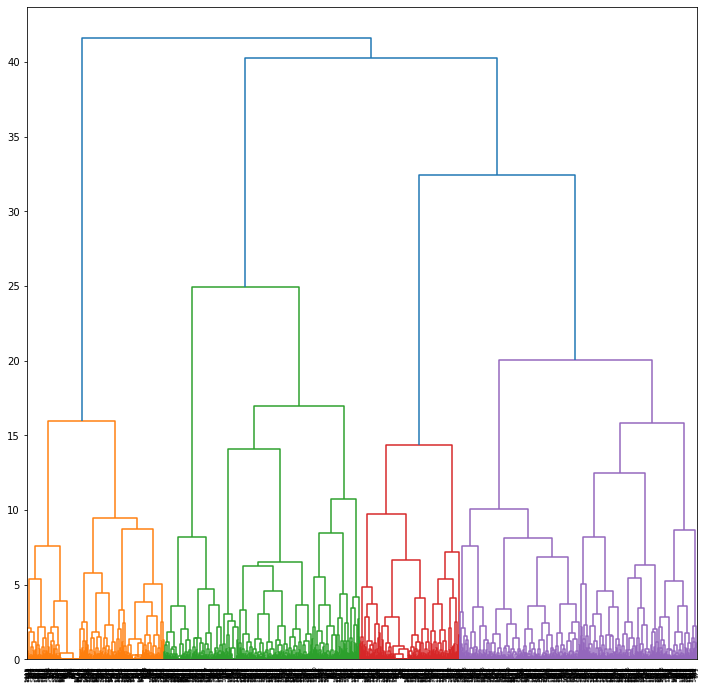

In [32]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = psychometrics_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

## Clusters for psychometrics 

We decided to create eight clusters because we felt it was the best way to group the people for an even representation. 

In [33]:
# INSTANTIATING a k-Means object with eight clusters
psychometrics_k_pca = KMeans(n_clusters   = 8,
                        random_state = 219)


# fitting the object to the data
psychometrics_k_pca.fit(psychometrics_pca_scaled)


# converting the clusters to a DataFrame
psychometrics_kmeans_pca = pd.DataFrame({'Clusters_Psy': psychometrics_k_pca.labels_})


# checking the results
print(psychometrics_kmeans_pca.iloc[: , 0].value_counts())

1    273
2    232
0    215
5    201
4    183
3    156
7    154
6    138
Name: Clusters_Psy, dtype: int64


In [34]:
# storing cluster centers
psychometrics_centroids_pca = psychometrics_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
psychometrics_centroids_pca_df = pd.DataFrame(psychometrics_centroids_pca)


# renaming principal components
psychometrics_centroids_pca_df.columns = ['Innate Leader',
                                          'Independent',
                                          'Follower']


# checking results (clusters = rows, pc = columns)
psychometrics_centroids_pca_df.round(2)

,Innate Leader,Independent,Follower
0,-0.17,0.90,-0.27
1,0.45,-0.67,0.23
2,-0.92,-0.36,0.71
3,0.48,0.01,1.70
4,1.38,0.74,-0.00
5,-0.69,-1.25,-0.72
6,-1.36,1.51,-0.35
7,0.82,-0.14,-1.55


## App behavior PCA

In [35]:
#scaling app behavior

behavior_scaled = unsupervised_scaler(df = apps_behavior)

print(np.var(apps_behavior), 'n\n')
print(np.var(behavior_scaled))

keep up tech developments                2.370016
asked tech advice                        0.917307
enjoy purchase new appliances/gadgets    1.972626
too much tech in life                    2.457613
enjoy using tech to control life         2.089064
tools and app to save time               1.096755
Music important                          1.214049
Knowing TV shows                         1.079791
too much information on internet         2.602488
like connecting through social media     1.191352
easier keeping in touch w/internet       1.634449
internet helps avoid family              1.062101
luxury brands                            2.269049
lookout for discounts                    1.338930
enjoys shopping                          1.980670
likes package deals                      1.755799
always shopping online                   2.008316
prefers designer brands                  2.158827
not enough apps                          2.144740
coolness of apps matter most             1.834877


In [36]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
behavior_pca = pca.fit_transform(behavior_scaled)

# comparing dimensions of each DataFrame
print("Original shape:", behavior_scaled.shape)
print("PCA shape     :", behavior_pca.shape)

Original shape: (1552, 28)
PCA shape     : (1552, 28)


In [37]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.29
PC 2: 0.103
PC 3: 0.054
PC 4: 0.043
PC 5: 0.039
PC 6: 0.033
PC 7: 0.033
PC 8: 0.03
PC 9: 0.028
PC 10: 0.026
PC 11: 0.025
PC 12: 0.024
PC 13: 0.022
PC 14: 0.021
PC 15: 0.021
PC 16: 0.02
PC 17: 0.02
PC 18: 0.019
PC 19: 0.018
PC 20: 0.017
PC 21: 0.017
PC 22: 0.016
PC 23: 0.015
PC 24: 0.015
PC 25: 0.015
PC 26: 0.014
PC 27: 0.012
PC 28: 0.01


In [38]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

1.0


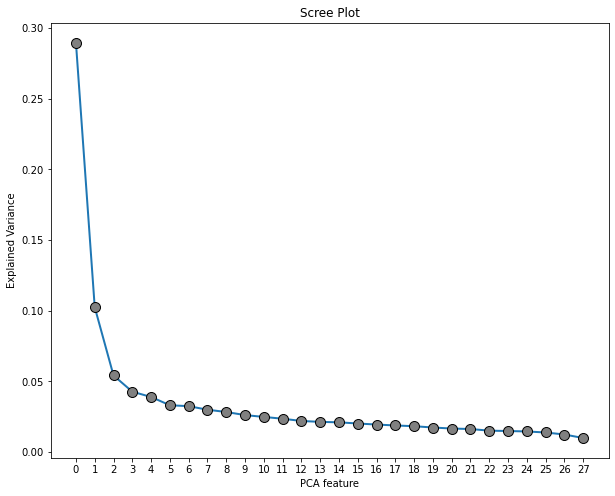

In [39]:
scree_plot(pca_object = pca,
          export = False)

### App behavior PCA analysis

We chose three personas for this Principal Component Analysis, as the elbow of the graph is formed after that. After that, the variance in the data drops and it would not be optimal to use.

In [40]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
apps_behavior_pca_3 = pca_3.fit_transform(behavior_scaled)

In [41]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
apps_behavior_factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
apps_behavior_factor_loadings = behavior_factor_loadings.set_index(behavior_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
apps_behavior_factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
apps_behavior_factor_loadings_3 = behavior_factor_loadings_3.set_index(behavior_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{apps_behavior_factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{apps_behavior_factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                         0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27
keep up tech developments              0.12 -0.14  0.41  0.02  0.06 -0.04 -0.14  0.56  0.15 -0.26 -0.14  0.33  0.20 -0.18 -0.06 -0.26 -0.14 -0.01  0.17 -0.10  0.10  0.00 -0.04 -0.15 -0.02 -0.04  0.05  0.03
asked tech advice                      0.14  0.30  0.19 -0.24  0.02  0.04 -0.32 -0.02 -0.19 -0.17 -0.05 -0.00 -0.17  0.19 -0.02 -0.15  0.48  0.12 -0.04 -0.20  0.03  0.39  0.24  0.04  0.08  0.14 -0.10 -0.00
enjoy purchase new appliances/gadgets  0.16  0.15  0.11 -0.38  0.22 -0.01 -0.41 -0.06 -0.06 -0.16  0.01 -0.31  0.06  0.22  0.31  0.00 -0.24 -0.15  0.06  0.23  0.04 -0.29 -0.21 -0.01 -0.08 -0.14  0.07  0.01
too much tech in life                  0.05 -0.26  0.53  0.14 -0.16  0.14  0.08 -0.18  0.07  0.05 -0.03 -0.13 -0.

## App behavior personas

The three personas created for psychometrics are:

 - Buyer: This group of people is looking for the new thing. They love to connect through social media in their mobile devices. They are always checking for new apps to download and they love comparing their apps with those of others. They want to keep up with the trends, and they believe that spending more in the apps for special features is worth it. Shopping online for them is a must, and for them money is for spending. 
 - Gadget: This group of people do not use their mobile devices for online shopping. They like to connect through social media, but they use their apps to save them time during the day. They are most likely asked by their peers about technology. 
 - Obligated: This group of people keeps up with technology, not becuase they want to ot because they like to, but because they need to. they think there is too much in their daily lives.

In [42]:
# naming each principal component
apps_behavior_factor_loadings_3.columns = ['Buyer',
                                      'Gadget',
                                      'Obligated']


# checking the result
apps_behavior_factor_loadings_3.round(decimals = 2)

,Buyer,Gadget,Obligated
keep up tech developments,0.12,-0.14,0.41
asked tech advice,0.14,0.30,0.19
enjoy purchase new appliances/gadgets,0.16,0.15,0.11
too much tech in life,0.05,-0.26,0.53
enjoy using tech to control life,0.19,-0.00,0.12
tools and app to save time,0.15,0.24,0.17
Music important,0.19,0.25,0.15
Knowing TV shows,0.17,0.32,0.06
too much information on internet,0.04,-0.32,0.50
like connecting through social media,0.20,0.26,0.05


In [43]:
# analyzing factor strengths per customer
apps_behavior_factor_loadings = pca_3.transform(behavior_scaled)


# converting to a DataFrame
apps_behavior_factor_loadings_df = pd.DataFrame(behavior_factor_loadings)


# renaming columns
apps_behavior_factor_loadings_df.columns = behavior_factor_loadings_3.columns


# checking the results
apps_behavior_factor_loadings_df.head(n=5).round(3)

,Buyer,Gadget,Obligated
0,4.427,1.054,1.618
1,-4.070,1.398,-1.889
2,4.811,1.040,-0.904
3,-2.487,0.913,-1.626
4,-0.481,1.978,0.326


In [44]:
# checking variance amongst clusters
np.var(apps_behavior_factor_loadings_df)

Buyer        8.107021
Gadget       2.870246
Obligated    1.518048
dtype: float64

In [45]:
# applying the unsupervised_scaler function
apps_behavior_pca_scaled = unsupervised_scaler( df = apps_behavior_factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(behavior_factor_loadings_df), '\n\n')
print(np.var(behavior_pca_scaled))

Buyer        8.107021
Gadget       2.870246
Obligated    1.518048
dtype: float64 


Buyer        1.0
Gadget       1.0
Obligated    1.0
dtype: float64


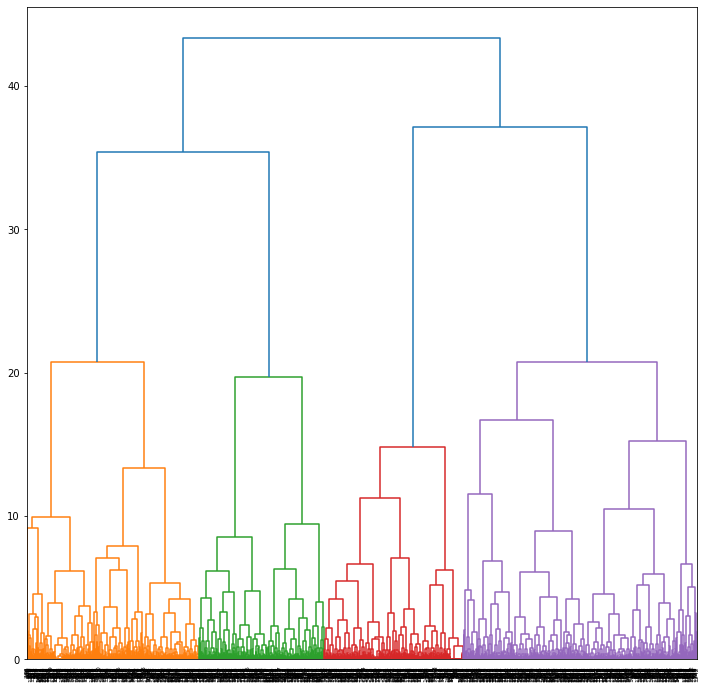

In [46]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = apps_behavior_pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

## Clusters for App behavior

We decided to create eight clusters because we felt it was the best way to group the people for an even representation.

In [47]:
# INSTANTIATING a k-Means object with eight clusters
apps_behavior_k_pca = KMeans(n_clusters   = 8,
                        random_state = 219)


# fitting the object to the data
apps_behavior_k_pca.fit(apps_behavior_pca_scaled)


# converting the clusters to a DataFrame
apps_behavior_kmeans_pca = pd.DataFrame({'Clusters_Behavior': apps_behavior_k_pca.labels_})


# checking the results
print(behavior_kmeans_pca.iloc[: , 0].value_counts())

1    248
4    226
7    203
2    191
3    190
6    183
5    173
0    138
Name: Clusters_Behavior, dtype: int64


In [48]:
# storing cluster centers
apps_behavior_centroids_pca = apps_behavior_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
apps_behavior_centroids_pca_df = pd.DataFrame(apps_behavior_centroids_pca)


# renaming principal components
apps_behavior_centroids_pca_df.columns = ['Buyer',
                                     'Gadget',
                                     'Obligated']


# checking results (clusters = rows, pc = columns)
apps_behavior_centroids_pca_df.round(2)

,Buyer,Gadget,Obligated
0,-1.60,0.62,-1.06
1,0.59,-0.03,0.47
2,-0.50,-0.59,-0.49
3,0.93,1.42,0.71
4,-0.77,-0.70,1.16
5,-0.63,1.00,-0.04
6,0.56,-1.44,0.04
7,0.84,0.06,-1.34


## Final cluster (Merging PCAs)

In [52]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([usage_apps_kmeans_pca,
                         psychometrics_kmeans_pca,
                         apps_behavior_kmeans_pca,
                         usage_app_factor_loadings_df,
                         psychometrics_factor_loadings_df,
                         apps_behavior_factor_loadings_df],
                         axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([apps_df.loc[ : , ['Age group','Education level','marital status',
                        'no children','children under 6','children 6-12',
                        'children 13-17','children 18 or older','Race',
                        'hispanic/latino','annual income range', 'gender',
                        'own iPhone', 'own iPod touch', 'own Android',
                        'own BlackBerry', 'own Nokia','own Windows Phone/Mobile',
                        'own HP/Palm', 'own Tablet','own other', 'No smartphone/device']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# checking the results
final_pca_clust_df.head()

NameError: name 'apps_behavior_kmeans_pca' is not defined

For the final Dataframe we have decided to rename the inputs so it would be easier to understand for people that might only see the table above. 
For each input we have written their meaning, for example: age groups 1 and 2 now have been converted into GenZ. 
This does not alter the overall structure of the Dataset.

In [ ]:
# renaming age groups

age_groups = {1 : 'GenZ',

              2 : 'GenZ',

              3 : 'Millennials',

              4 : 'Millennials',

              5 : 'Millennials',

              6 : 'GenX',

              7 : 'GenX',

              8 : 'GenX',

              9 : 'Boomers',

              10: 'Boomers',

              11: 'Boomers'}


final_pca_clust_df['Age group'].replace(age_groups, inplace = True)

 

 

 

# renaming education levels

education_level = {1 : 'Some high school',

                 2 : 'High school graduate',

                 3 : 'Some college',

                 4 : 'College graduate',

                 5 : 'Some post-graduate studies',

                 6 : 'Post graduate degree'}

 


final_pca_clust_df['Education level'].replace(education_level, inplace = True)

 


# renaming marital_status

marital_status = {1 : 'Married',

                  2 : 'Single',

                  3 : 'Single with a partner',

                  4 : 'Separated/Widowed/Divorced'}

 

final_pca_clust_df['marital status'].replace(marital_status, inplace = True)

 

# renaming race description

race_description = {1 : 'White or Caucasian',

                2 : 'Black or African American',

                 3 : 'Asian',

                 4 : 'Native Hawaiian or Other Pacific Islander',

                 5 : 'American Indian or Alaska Native',

                 6 : 'Other race'}

 

final_pca_clust_df['Race'].replace(race_description, inplace = True)

 


# renaming hispanic or latino ethnicity

hispanic_latino_ethnicity = {1 : 'Yes',

                             2 : 'No'}

 

final_pca_clust_df['hispanic/latino'].replace(hispanic_latino_ethnicity, inplace = True)

 

# renaming income level

income_level = { 1 : 'Under $10,000',

                 2 : '$10,000-$14,999',

                 3 : '$15,000-$19,999',

                 4 : '$20,000-$29,999',

                 5 : '$30,000-$39,999',

                 6 : '$40,000-$49,999',

                 7 : '$50,000-$59,999',

                 8 : '$60,000-$69,999',

                 9 : '$70,000-$79,999',

                10 : '$80,000-$89,999',

                11 : '$90,000-$99,999',

                12 : '$100,000-$124,999',

                13 : '$125,000-$149,999',

                14 : '$150,000 and over'}

 

final_pca_clust_df['annual income range'].replace(income_level, inplace = True)

 

# renaming gender

gender_description = {1 : 'Male',

                      2 : 'Female'}

 


final_pca_clust_df['gender'].replace(gender_description, inplace = True)

 


# adding a productivity step

data_df = final_pca_clust_df

 


# checking results

data_df

 

## Recommendations

## 1. Buyer persona and age

After analyzing the behavior data from the survey, we came up with a persona who we called ‘Buyer’. This persona enjoys shopping online, follows hot trends, makes impulsive purchases, and is easily influenced. This persona is most likely using his mobile apps as a means of entertainment.

After a closer look into this persona, we came to the realization that a segment in the boomers age group is more sensitive towards the usage of their mobile devices for these purposes. Our advice is to create a strategy based on online shopping and entertainment, targeting a boomer segment in our customer base.

In [ ]:
########################
# Age group 
########################
# Shopping Boomers
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Age group',
            y    = 'Buyer',
            hue  = 'Clusters_Behavior',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## 2. Followers and race

After analyzing the psychometrics side of the survey, we identified three personas: Innate leader, Independent and Follower. In this case, our strategy will target the Follower persona. This persona is someone that likes to be told what to do, who is influenced easily when making decisions and follows hot trends.

After a closer look we discovered that American Indian and Alaskan are keener to follow hot trends. Therefore, we should target influencers in this race/ethnicity group to boost our client base within this segment, considering that they are willing to get to know and try new apps if they are popular within their communities.

In [ ]:
########################
# Cluster Psy, Race, Follower
########################
# Followers within community
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Race',
            y    = 'Follower',
            hue  = 'Clusters_Psy',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

## 3. Digital Castaways

Based in the analysis of the apps usage data, we have identified inside the persona of No App User, those who don’t use a lot of apps in their daily life, a segment where it would not be fruitful to invest, we have called this ultimate persona the Digital Castaways.
The Digital Castaways are mostly men, that don’t have a high school diploma, mostly single form a race other than Black or African American, Asian, White, American Indian or Pacific Islander that don’t own an iPhone. This persona is the less likely to download and use apps, so targeting them would not bring value to us. Therefore the business strategy should not include this group of people.

In [ ]:
########################
# Cluster Psy, Race, Follower
########################
# Followers within community
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Education level',
            y    = 'No App User',
            hue  = 'Clusters_behavior',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
########################
# Cluster Psy, Race, Follower
########################
# Followers within community
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'marital status',
            y    = 'No App User',
            hue  = 'Clusters_behavior',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
########################
# Cluster Psy, Race, Follower
########################
# Followers within community
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'Race',
            y    = 'No App User',
            hue  = 'Clusters_behavior',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
########################
# Cluster Psy, Race, Follower
########################
# Followers within community
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'gender',
            y    = 'No App User',
            hue  = 'Clusters_behavior',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
########################
# Cluster Psy, Race, Follower
########################
# Followers within community
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x    = 'own iPhone',
            y    = 'No App User',
            hue  = 'Clusters_behavior',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# Conclusions

After all the analysis made from the Marketing survey we have finally come up with eight different personas, for our customer base:
 - Innate leader
 - Independent
 - Follower
 - Buyer
 - Gadget
 - Obligated
 - No App User
 - Practical
 - Keep Updated
 
To optimize the business efforts, we are giving three recommendations based on this analytical research. 

 - Influencers collaborations in specific communities.
 - Avoid Digital Castaways.
 - Focus on online shopper Boomers. 